In [161]:
%matplotlib inline

from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('ggplot')
seed = 13

In [169]:
def get_nnar(X, y, rounds=2, thresh=0.5, class_rank=[(0,[1,2]),(1,[2])]):
    '''
    Returns noisy not at random labels.
    
    Note: class_rank is a list of tuples. The first element in the tuple
    is the 'majority' class and the second element is the list of classes
    that are subject to flip to the 'majority'. Each tuple is applied in
    order.
    
    Example: class_rank=[(0,[1,2]),(1,[2])]
    1) Instances labeled class 1 or class 2 are subject to flip to class 0.
    2) Instances labeled class 2 are subject to flip to class 1.
    
    '''
    nn = NearestNeighbors(n_neighbors=10).fit(X,y)
    dist, ind = nn.kneighbors(X)
    
    y_nnar = y.copy()
    for j in range(1,rounds+1):
        for pair in class_rank:
            mask = np.random.uniform(size=y_nnar.shape[0])
            for i, val in enumerate(y_nnar):
                if (y_nnar[i] == pair[0]) & (y_nnar[ind[i,j]] in pair[1]) & (mask[i] > thresh):
                    y_nnar[ind[i,j]] = pair[0]
    return y_nnar

Let's generate some example data for a simple classification problem.

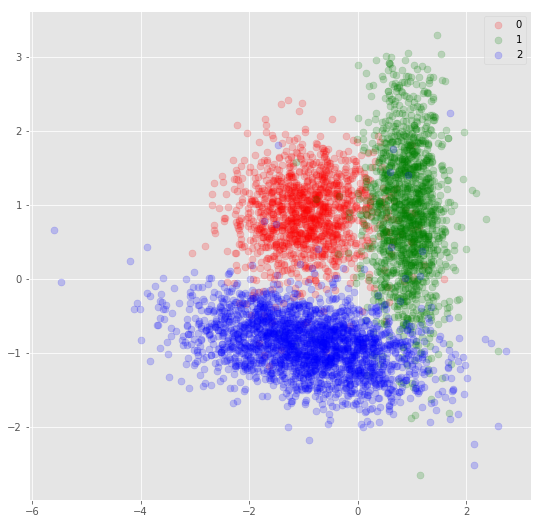

In [168]:
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=3, n_clusters_per_class=1, weights=[0.25,0.30,0.55],
                           hypercube=True, class_sep=0.9, random_state=seed)

plt.figure(figsize=(9,9))
cmap = {0:'red', 1:'green', 2:'blue'}
for c in [0,1,2]:
    idx = y == c
    plt.scatter(X[idx,0], X[idx,1], c=cmap[c], alpha=0.2, s=50, label=c)
plt.legend(loc='best')
plt.show()

Label noise _not at random_.

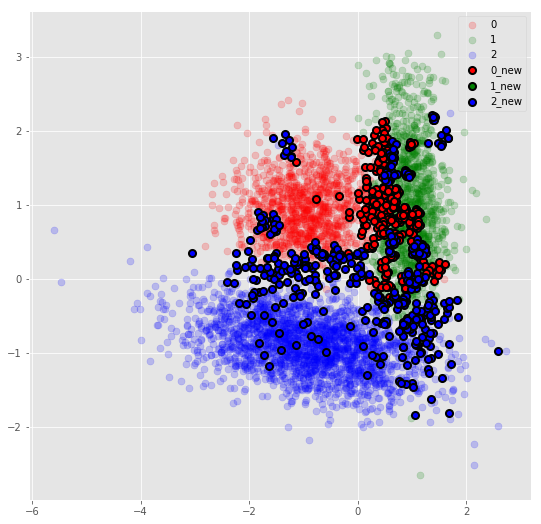

In [172]:
y_nnar = get_nnar(X, y, rounds=5, thresh=0.2, class_rank=[(2,[0,1]),(0,[1])])

idx_new = (y != y_nnar)

plt.figure(figsize=(9,9))
cmap = {0:'red', 1:'green', 2:'blue'}
for c in [0,1,2]:
    idx = y == c
    plt.scatter(X[idx,0], X[idx,1], c=cmap[c], alpha=0.2, s=50, label=c)
for c in [0,1,2]:
    idx_new = (y_nnar==c) & (y!=y_nnar)
    plt.scatter(X[idx_new,0], X[idx_new,1], c=cmap[c], edgecolor='black', lw=2, s=50, label='%d_new'%c)
plt.legend(loc='best')
plt.show()

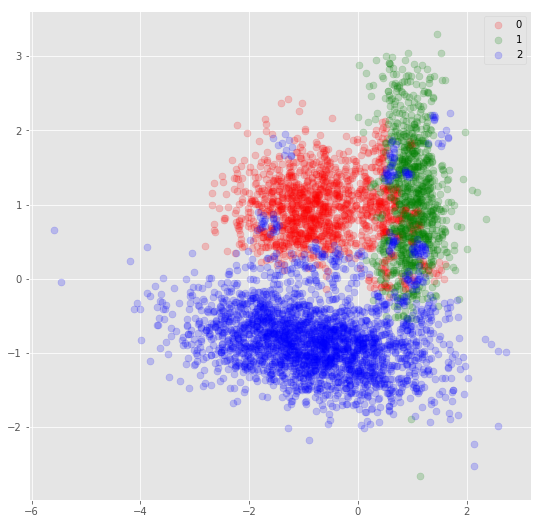

In [173]:
plt.figure(figsize=(9,9))
cmap = {0:'red', 1:'green', 2:'blue'}
for c in [0,1,2]:
    idx = y_nnar == c
    plt.scatter(X[idx,0], X[idx,1], c=cmap[c], alpha=0.2, s=50, label=c)
plt.legend(loc='best')
plt.show()